# How well do jobs and skills pay for Data Analysts?
### Methology
  1. Evaluate median salary for top 6 data jobs
  2. Find median salary per skill for Data Analysts
  3. Visualize for highest paying  skills and most demanded skills

In [2]:
# Filter for the job titles and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
# Get top 6 most common job titles
top6_titles = df_US['job_title_short'].value_counts().nlargest(6).index
df_US_top6 = df_US[df_US['job_title_short'].isin(top6_titles)]

# print(df_US_top6['salary_year_avg'].describe())

In [5]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

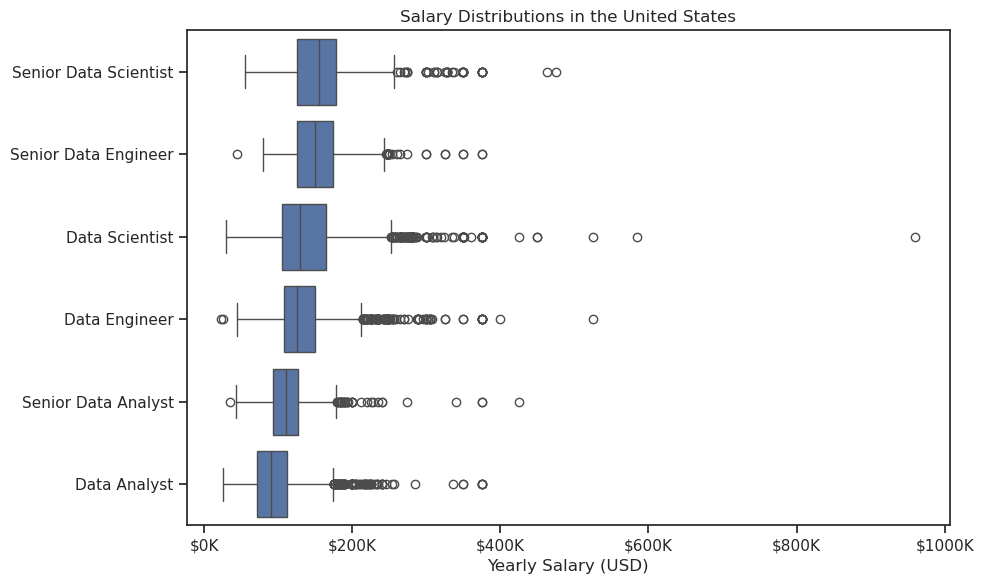

In [6]:
sns.set_theme(style='ticks')

plt.figure(figsize=(10, 6)) # Set size: make nice and big

sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)

# This is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')

# plt.xlim(0, 600000)
ticks_x = FuncFormatter(lambda y, pos: f'${int(y / 1000)}K')  # Note: divide by 1000, not 100
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.tight_layout()
plt.show()
